In [56]:
import numpy as np
x = np.zeros(10)

def id(x):
    return x.__array_interface__['data'][0]

In [4]:
x.strides

(8,)

In [6]:
y = np.zeros((10, 10))
y.strides

(80, 8)

In [7]:
n = 1000
a = np.arange(n)

In [13]:
b = np.lib.stride_tricks.as_strided(a, (n, n), (0, 8))

In [14]:
b

array([[  0,   1,   2, ..., 997, 998, 999],
       [  0,   1,   2, ..., 997, 998, 999],
       [  0,   1,   2, ..., 997, 998, 999],
       ..., 
       [  0,   1,   2, ..., 997, 998, 999],
       [  0,   1,   2, ..., 997, 998, 999],
       [  0,   1,   2, ..., 997, 998, 999]])

In [16]:
b.size, b.shape, b.nbytes

(1000000, (1000, 1000), 8000000)

In [18]:
b.strides

(0, 8)

In [19]:
import numpy as np
from numpy.lib.stride_tricks import as_strided

In [63]:
n = 5
k = 2
a = np.linspace(1, n, n); aid = id(a)
aid = id(a)

In [64]:
as_strided(a, (k, n), (8, 8))

array([[ 1.,  2.,  3.,  4.,  5.],
       [ 2.,  3.,  4.,  5.,  0.]])

In [65]:
as_strided(a, (k, n-k+1), (8, 8))

array([[ 1.,  2.,  3.,  4.],
       [ 2.,  3.,  4.,  5.]])

In [66]:
def shift1(x, k):
    return np.vstack([x[i:n-k+i+1] for i in range(k)])

def shift2(x, k):
    return as_strided(x, (k, n-k+1), (8, 8))

In [67]:
b = shift1(a, k); b, id(b) == aid

(array([[ 1.,  2.,  3.,  4.],
        [ 2.,  3.,  4.,  5.]]), False)

In [68]:
c = shift2(a, k); c, id(c) == aid

(array([[ 1.,  2.,  3.,  4.],
        [ 2.,  3.,  4.,  5.]]), True)

In [69]:
id(c)

140634007213408

In [70]:
aid

140634007213408

In [71]:
n, k = 100, 10
t = np.linspace(0., 1., n)
x = t + .1 * np.random.randn(n)

In [74]:
y = shift2(x, k)
x_avg = y.mean(axis=0)

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt

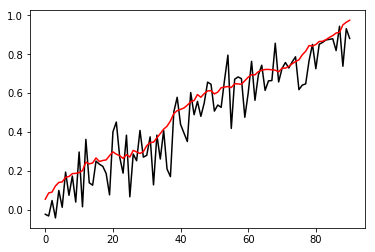

In [79]:
f = plt.figure()
plt.plot(x[:-k+1], '-k')
plt.plot(x_avg, '-r')

In [75]:
%timeit shift1(x, k)

10000 loops, best of 3: 23.2 µs per loop


In [80]:
%%timeit y = shift1(x, k)
z = y.mean(axis=0)

The slowest run took 6.44 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 7.22 µs per loop


In [81]:
%timeit shift2(x, k)

The slowest run took 6.57 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 7.44 µs per loop


In [82]:
n, d = 100000, 100
a = np.random.random_sample((n, d)); aid = id(a)

In [98]:
b1 = a[::10]
b2 = a[np.arange(0, n, 10)]

In [99]:
id(b1) == aid, id(b2) == aid

(True, False)

In [101]:
%timeit a[::10]

The slowest run took 19.12 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 193 ns per loop


In [102]:
%timeit a[np.arange(0, n, 10)]

1000 loops, best of 3: 1.16 ms per loop


In [105]:
b3 = ([[11, 12, 13], [21,22,23], [31,32,33], [41,42,43], [51,52,53], [61,62,63]])
b3[2:3]

[[31, 32, 33]]

In [106]:
i = np.arange(0, n, 10)
b1 = a[i]
b2 = np.take(a, i, axis=0)

In [108]:
np.array_equal(b1, b2)

True

In [109]:
%timeit a[i]

1000 loops, best of 3: 1.02 ms per loop


In [110]:
%timeit np.take(a, i, axis=0)

1000 loops, best of 3: 1.03 ms per loop
